In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import pyqosc as qo
import scipy as sp

options = qt.Options(nsteps = int(1e9))
plt.rcParams.update({"font.size" : 13})

In [12]:
def sim_1(vdp, rho_0, lim = 6, classical_finish = None, t_eval = None):

    Ham, c_ops = vdp.dynamics()
    
    if not(classical_finish):
        classical_finish = 50 * 2 * np.pi / vdp.omega_0
    
    if not(t_eval):
        t_eval = 0.5 * classical_finish
        
    b_0 = qt.expect(qt.destroy(vdp.N), rho_0)
    init_polar = [np.abs(b_0), np.angle(b_0)]
    
    rho_ss = qo.steady_state(Ham, c_ops, plot_wigner = True, xlim=lim, ylim = lim)
    fig = plt.gcf()
    fig.set_size_inches(10,10)
    ax = plt.gca()
    timelst,  r, phi, beta = vdp.adler(t_end = classical_finish, t_eval = t_eval, plot = True, 
                            overlap_with=ax, timepoints_returned=10000, init_polar=init_polar,
                            one_cycle = True)
    
    # qo.ss_c_phasedist(rho_ss, r, phi, 50, True)
    # ax = plt.gca()
    # qo.ss_q_phasedist(rho_ss, 100, True, ax)
    
    ax = plt.gca()
    ax.scatter(r[0]*np.cos(phi[0]), r[0]*np.sin(phi[0]), c = "r")
    ax.legend(loc = "best")
    plt.show()


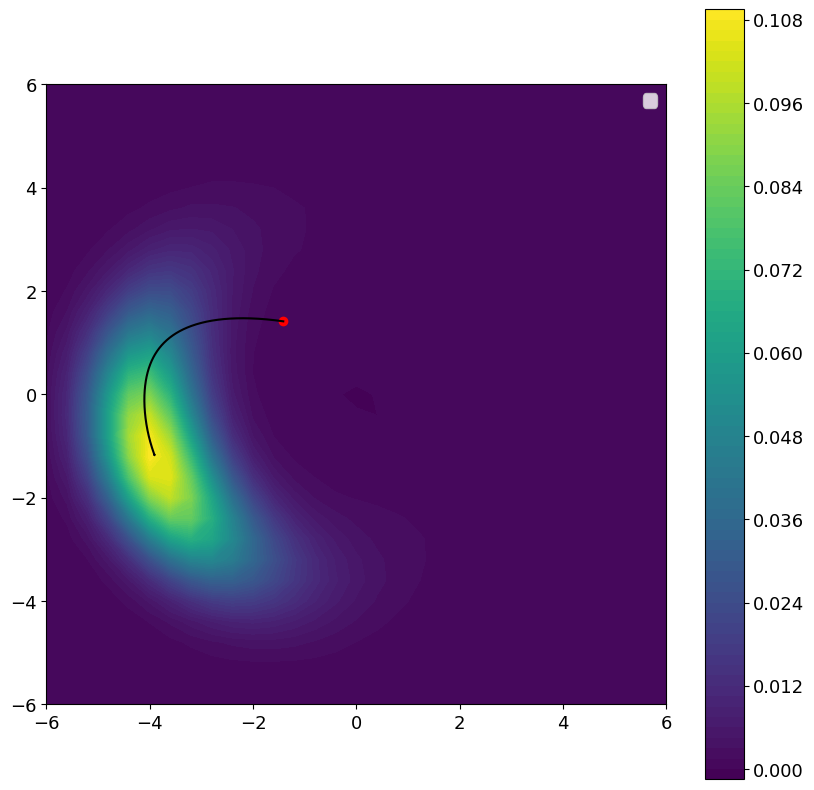

In [14]:
sim_1(qo.vdp(N=20, omega = 1.1, Omega_1= 0, Omega_2 = 1, gamma_1 = 1, gamma_2 = 0.1), 
      rho_0 = qt.coherent_dm(20, -1+1j),
      classical_finish=1e2,
      t_eval = 1e2)

In [ ]:
sim_1(qo.vdp(N=40, omega = 1.7, Omega_1= 0, Omega_2 = 1, gamma_1 = 1, gamma_2 = 0.1), 
      rho_0 = qt.coherent_dm(40, -1+1j),
      classical_finish=1e4,
      t_eval = 1e4)